In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,8)
import numpy as np

In [4]:
r = 10**(36.5/5)/1000
# bogenminuten
D = [4.4, 4.1, 3.3, 3.6, 6.0, 7.0, 4.7, 5.3, 3.1]
D25 = [7.2, 4.5, 4.2, 3.7, 6.9, 6.9, 3.9, 5.4, 3.1]
#in rad
D_rad = [x*math.pi/10800 for x in D]
D25_rad = [x*math.pi/10800 for x in D25]
d = [2*r*math.tan(x/2) for x in D_rad]
d25 = [2*r*math.tan(x/2) for x in D25_rad]

##Daten Antonia
#in Bogenminuten
D_a=[4.8, 3.1, 2.8, 3.2, 5.8, 5.4, 2.3, 4.0, 2.7]
#in rad
D_a_rad = [x*math.pi/10800 for x in D_a]
#in kpc
d_a = [2*r*math.tan(x/2) for x in D_a_rad]

print(f"{r=},\n{d=},\n{d_a=},\n{d25=}")

r=19952.62314968879,
d=[25.537527833482134, 23.796332326047228, 19.15314473119446, 20.894340011736663, 34.823905677145106, 40.62789368091915, 27.278723438156767, 30.761114965745215, 17.992347918425462],
d_a=[27.859121995803065, 17.992347918425462, 16.251152755749576, 18.572746320881084, 33.663108261047675, 31.341513597794663, 13.349160952193058, 23.215933844031834, 15.670754382269424],
d25=[41.788691480082456, 26.11792635724185, 24.37673081813037, 21.47473845593661, 40.04749480724356, 40.04749480724356, 22.63553537183864, 31.341513597794663, 17.992347918425462]


# Aufgabe 1

|NGC   |  $\mathrm{Type_{KS}}$  |  $\mathrm{Type_{AM}}$  |  $D_{25}'$  |   $D_{\mathrm{KS}}'$   |  $D_{\mathrm{AM}}'$  |    Durchmesser (kpc) aus $D_{25}'$  |  Durchmesser (kpc) aus $D_{\mathrm{KS}}'$  |  Durchmesser (kpc) aus $D_{\mathrm{AM}}'$  |   Besonderheiten    |
|------|--------|--------|-------------|--------|--------|:-----------------------------------:|----------------------------|----------------------------|---------------------|
|4486  |  E1    |  E0    |  7.2        |   4.4  |  4.8  |        41.79                        |    25.54                   |    27.86                   | Bei E0 ist Radius gr. Halbachse|
|4473  |  E5    |  E6    |  4.5        |   4.1  |  3.1  |        26.12                        |    23.80                   |    17.99                   |                     |
|4552  |  S0    |  S0    |  4.2        |   3.3  |  2.8  |        24.38                        |    19.15                   |    16.25                   | Unterschied zu E0: lange konstant hell|
|4461  |  Sa    |  Sa    |  3.7        |   3.6  |  3.2  |        21.47                        |    20.89                   |    18.57                   | Kaum Sprialarme zu sehen, Buldge deutlich|
|4501  |  Sb    |  Sb    |  6.9        |   6.0  |  5.8  |        40.05                        |    34.82                   |    33.66                   |       |
|4321  |  Sc    |  Sc    |  6.9        |   7.0  |  5.4  |        40.04                        |    40.63                   |    31.34                   |  |
|4371  |  SBa   |  SBa    |  3.9        |   4.7  |  2.3  |        22.64                        |    27.28                   |    13.35                   | Leicht Balken in Richung kl. Halbachse sichtbar|
|4548  |  SBb   |  SBb    |  5.4        |   5.3  |  4.0  |        31.34                        |    30.76                   |    23.22                   | |
|4294  |  Sbc   |  SBc    |  3.1        |   3.1  |  2.7  |        17.99                        |    17.99                   |    15.67                   | Struktur schwer zu erkennen aufgrund der Neigung|

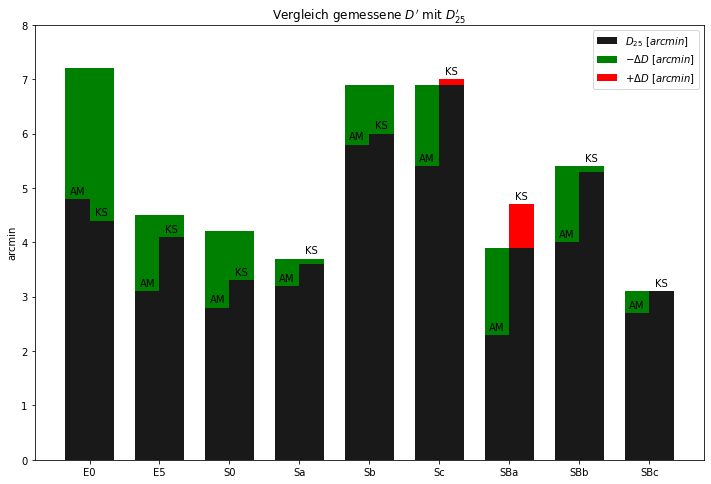

In [45]:
def autolabel(ax, rects, refs, text):
    """Attach a text label above each bar in *rects* = return value of bar."""
    for rect, ref in zip(rects, refs):
        if rect.get_height() != 0:
            if abs(rect.get_height()) > 0.3 or rect.get_height() > 0:
                height = ref.get_height() + rect.get_height()
            else:
                height = ref.get_height()
            ax.annotate(text,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
# combined chart
labels = ["E0", "E5", "S0", "Sa", "Sb", "Sc", "SBa", "SBb", "SBc"]
width = 0.35
# D25 data
rects_ref = plt.bar([x - width/2 for x in range(9)], D25, width, alpha=.9, color="black",label=r"$D_{25}~[arcmin]$")
plt.bar([x + width/2 for x in range(9)], D25, width, alpha=.9, color="black")
# Kayran data
rects_K_G = plt.bar([x + width/2 for x in range(9)], [y-x if x-y > 0 else 0 for x,y in zip(D25,D)], width, bottom=D25, color="green", label=r"$-\Delta D~[arcmin]$")
rects_K_R = plt.bar([x + width/2 for x in range(9)], [y-x if y-x > 0 else 0 for x,y in zip(D25,D)], width, bottom=D25, color="red", label=r"$+\Delta D~[arcmin]$")
autolabel(plt.axes(), rects_K_G, rects_ref, "KS")
autolabel(plt.axes(), rects_K_R, rects_ref, "KS")
# extra treatment for label for last SBc
plt.axes().annotate("KS",
                    xy=(
                        rects_K_G[-1].get_x() + rects_K_G[-1].get_width() / 2,
                        rects_ref[-1].get_height()
                    ),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Antonia data
rects_A_G = plt.bar([x - width/2 for x in range(9)], [y-x if x-y > 0 else 0 for x,y in zip(D25,D_a)],  width, bottom=D25, color="green")
plt.bar([x - width/2 for x in range(9)], [y-x if y-x > 0 else 0 for x,y in zip(D25,D_a)], width, bottom=D25, color="red")
autolabel(plt.axes(), rects_A_G, rects_ref, "AM")

plt.title(r"Vergleich gemessene $D'$ mit $D_{25}'$")
plt.ylabel("arcmin")
plt.ylim(0,8)
plt.axes().set_xticks(range(9))
plt.axes().set_xticklabels(labels)
plt.legend()
plt.show()

# Aufgabe 2

| NGC | m | $\mathrm{Type_{AM}}$ | $\mathrm{Type_{KS}}$ | Kommentar |
|-----|---|----------------------|----------------------|-----------|
| 4294 | 13.0 | SBc| SBc | Typ gegeben |
| 4299 | 13.1 | Sb | Sc  |   |
| 4302 | 13.2 | Sc | Sc / SBc | Staub sichtbar, kein dominanter Bulge |
| 4321 | 10.8 | Sc | Sc | Typ gegeben |
| 4371 | 12.1 | SBa| SBa | Typ gegeben |
| 4374 | 10.9 | E1 | E0 | kein Staub |
| 4379 | -    | E3 | E3 | kein Staub |
| 4402 | 12.5 | E7 | Sc / SBc | Staub sichtbar, kein dominanter Buldge |
| 4431 | -    | E6 | E7 | kein Staub oder Strukturen |
| 4435 | 11.8 | SB0| S0 | "Linsenförmig", Scheibe leicht erkennbar |
| 4440 | -    | SBa| SBa |  Balken deutlich, mit Spiralarmen als Ring |
| 4461 | 12.4 | Sa | Sa | Typ gegeben |
| 4473 | 11.7 | E5 | E5 | Typ gegeben |
| 4478 | 12.5 | E2 | E3 | kein Staub oder Strukturen |
| 4486 | 10.7 | E0 | E0 | Typ gegeben |
| 4501 | 10.9 | Sb | Sb | Typ gegeben |
| 4516 | -    | SBa| SBc | Spiralarme ohne Knick am Balken |
| 4548 | 11.9 | SBb| SBb | Typ gegeben |
| 4552 | 11.3 | S0 | E0 / S0 | Typ gegeben |
| 4564 | 12.1 | E6 | S0 | "Linsenförmig", kein Staub oder Strukturen |
| 4568 | -    | Sb | Sa |  Spiralarme eng, viel Staub, deutlicher Buldge |
| 4571 | 12.8 | Sc | Sb |  Spiralarme weniger eng, viel Staub, deutlicher Buldge |
| 4579 | 11.0 | Sb | Sb |  deutlicher Buldge, viel Staub, lockere Spiralarme |

| NGC | $D_{\mathrm{AM}}[\mathrm{Grad}]$ | $D_{\mathrm{KS}}[\mathrm{Grad}]$ | $a_{\mathrm{AM}}'$ | $b_{\mathrm{AM}}'$ | $i_{\mathrm{AM}}$ | $a_{\mathrm{KS}}'$ | $b_{\mathrm{KS}}'$ | $i_{\mathrm{KS}}$ | Kommentar |
|-----|----------------------------------|----------------------------------|--------------------|--------------------|-------------------|--------------------|--------------------|-------------------|----------|
| 4294 |0.0450 |0.0517 | 1.35 | 0.51 | 22.22° | 1.55 | 0.6  | 22.77° |  |
| 4299 |0.0216 |0.0283 | 0.65 | 0.53 | 54.63° | 0.85 | 0.85 | 90°    | "face on" |
| 4302 |0.0816 |0.0800 | 2.45 | 0.31 | 7.20°  | 2.4  | -    | 0°     |  "edge on" |
| 4321 |0.0900 |0.1167 | 2.7  | 2.58 | 72.5°  | 3.5  | 2.85 | 54.52° | |
| 4371 |0.0600 |0.0783 | 1.15 | 0.9  | 51.5°  | 2.35 | 1.3  | 33.59° | |
| 4374 |0.0683 |0.0917 | -    | -    | -      | -    | -    | -      | wegen Typ keine Inklination |
| 4379 |0.0233 |0.0333 | 0.7  | 0.6  | 58.99° | -    | -    | -      | |
| 4402 |0.055  |0.0667 | 1.65 | 0.42 | 14.73° | 2.0  | -    | 0°     | "edge on" |
| 4431 |0.0233 |0.0333 | 0.7  | 0.39 | 33.37° | -    | -    | -      | |
| 4435 |0.0333 |0.0383 | 1.0  | 0.75 | 48.59° | 1.15 | -    | 0°     | "edge on" |
| 4440 |0.025  |0.0267 | 0.75 | 0.45 | 36.94° | 0.8  | 0.7  | 61.04° | |
| 4461 |0.0466 |0.0600 | 1.6  | 0.5  | 18.21° | 1.8  | 0.3  | 9.59°  | |
| 4473 |0.05   |0.0683 | 1.5  | 0.75 | 30.00° | -    | -    | -      | |
| 4478 |0.025  |0.0367 | 0.75 | 0.5  | 41.81° | -    | -    | -      | |
| 4486 |0.08   |0.0733 | -    | -    | -      | -    | -    | -      | wegen Typ keine Inklination |
| 4501 |0.0966 |0.1000 | 2.9  | 1.48 | 30.69° | 3.0  | 1.35 | 26.74° | |
| 4516 |0.0233 |0.0200 | 0.7  | 0.31 | 26.48° | 0.6  | 0.17 | 16.46° | |
| 4548 |0.0816 |0.0883 | 2.45 | 1.95 | 52.74° | 2.65 | 1.75 | 41.33° | |
| 4552 |0.0466 |0.0550 | -    | -    | -      | -    | -    | -      | wegen Typ keine Inklination |
| 4564 |0.0383 |0.0458 | 1.15 | 0.47 | 23.99° | 1.36 | -    | 0°     | "edge on" |
| 4568 |0.0716 |0.0767 | 2.15 | 0.68 | 18.44° | 2.3  | 0.5  | 12.56° | |
| 4571 |0.055  |0.0500 | 1.65 | 1.49 | 64.16° | 1.5  | 1.4  | 68.96° | |
| 4579 |0.0849 |0.0717 | 2.55 | 1.89 | 47.67° | 2.15 | 1.6  | 48.09° | |

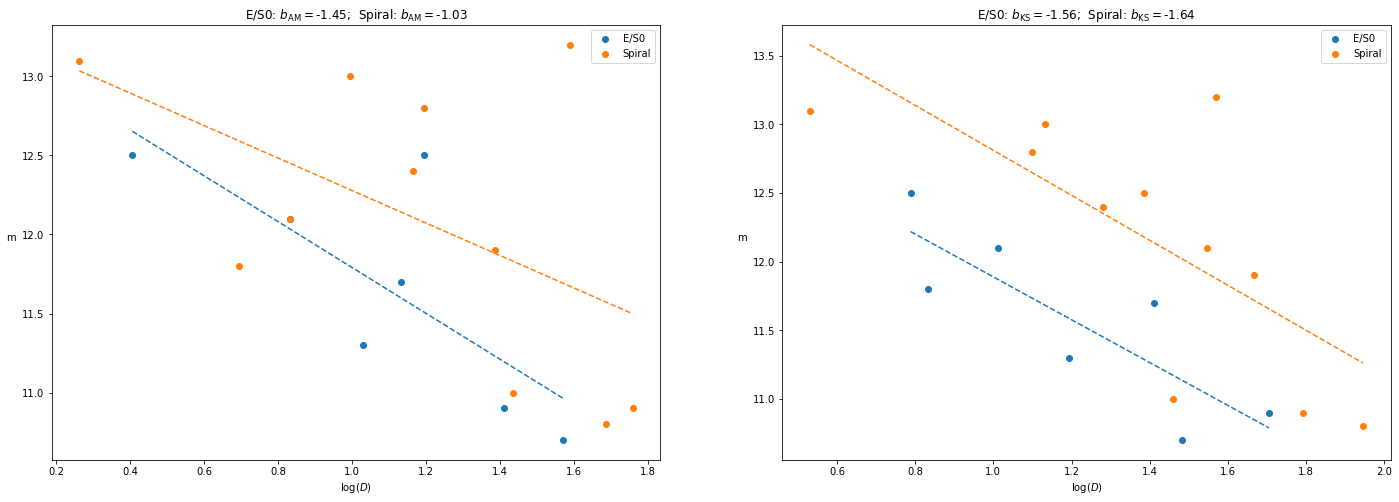

In [59]:
fig, (axA, axK) = plt.subplots(ncols=2)
fig.set_size_inches(24,8)

# Daten Kayran
D_E = [5.5, 2.3, 4.1, 2.2, 4.4, 3.3, 2.75]
m_E = [10.9, 11.8, 11.7, 12.5, 10.7, 11.3, 12.1]
D_S = [3.1, 1.7, 4.8, 7.0, 4.7, 4.0, 3.6, 6.0, 5.3, 3.0, 4.3]
m_S = [13.0, 13.1, 13.2, 10.8, 12.1, 12.5, 12.4, 10.9, 11.9, 12.8, 11.0]
D_E_log = [math.log(x) for x in D_E]
D_S_log = [math.log(x) for x in D_S]

E_b_fit, E_a_fit = np.polyfit(D_E_log, m_E, 1)
E_fit = np.poly1d((E_b_fit, E_a_fit))
S_b_fit, S_a_fit = np.polyfit(D_S_log, m_S, 1)
S_fit = np.poly1d((S_b_fit, S_a_fit))

axK.scatter(D_E_log, m_E, label="E/S0")
axK.scatter(D_S_log, m_S, label="Spiral")
axK.plot(sorted(D_E_log), [E_fit(x) for x in sorted(D_E_log)], ls="--")
axK.plot(sorted(D_S_log), [S_fit(x) for x in sorted(D_S_log)], ls="--")

axK.legend()
axK.set_xlabel(r"$\log(D)$")
axK.set_ylabel("m    ", rotation=0)
axK.set_title(r"E/S0: $b_{\mathrm{KS}}=$" + f"{E_b_fit:.2f};  " + r"Spiral: $b_{\mathrm{KS}}=$" + f"{S_b_fit:.2f}")


# Daten Antonia
D_E_a = [4.1, 3.3, 3.1, 1.5, 4.8, 2.8, 2.3]
m_E_a = [10.9, 12.5, 11.7, 12.5, 10.7,  11.3, 12.1]
D_S_a = [2.7, 1.3, 4.9, 5.4, 2.3, 2.0, 3.2, 5.8, 4.0, 3.3, 4.2]
m_S_a = [13.0, 13.1, 13.2, 10.8, 12.1, 11.8, 12.4, 10.9, 11.9, 12.8, 11.0]
D_E_a_log = [math.log(x) for x in D_E_a]
D_S_a_log = [math.log(x) for x in D_S_a]

E_b_fit_a, E_a_fit_a = np.polyfit(D_E_a_log, m_E_a, 1)
E_fit_a = np.poly1d((E_b_fit_a, E_a_fit_a))
S_b_fit_a, S_a_fit_a = np.polyfit(D_S_a_log, m_S_a, 1)
S_fit_a = np.poly1d((S_b_fit_a, S_a_fit_a))

axA.scatter(D_E_a_log, m_E_a, label="E/S0")
axA.scatter(D_S_a_log, m_S_a, label="Spiral")
axA.plot(sorted(D_E_a_log), [E_fit_a(x) for x in sorted(D_E_a_log)], ls="--")
axA.plot(sorted(D_S_a_log), [S_fit_a(x) for x in sorted(D_S_a_log)], ls="--")

axA.legend()
axA.set_xlabel(r"$\log(D)$")
axA.set_ylabel("m    ", rotation=0)
axA.set_title(r"E/S0: $b_{\mathrm{AM}}=$" + f"{E_b_fit_a:.2f};  " + r"Spiral: $b_{\mathrm{AM}}=$" + f"{S_b_fit_a:.2f}")

# plot
plt.show()